# Classifier for Animals-10 dataset

There are three classificators for Animals-10 dataset:
- Random Forest
- Feed-Forward Neural Network
- Convolutional Neural Network

Dataset link: https://drive.google.com/file/d/14K-mX-Aqqk8cNdTmZHEmMVf7y4wtuSxJ/view?usp=sharing

1. Lets load all the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

from abc import ABC, abstractmethod

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Flatten, Dense, Reshape
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

2. Extract and prepare data from the dataset

In [2]:
dataset_path = "Animals-10/raw-img"

image_size = (224, 224)  

resnet_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image_path, model):
    image = load_img(image_path, target_size=image_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    features = model.predict(image_array)
    return features.flatten()

X = []
y = []
class_labels = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]

for label, class_name in enumerate(class_labels):
    class_folder = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)
        if not image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        try:
            features = extract_features(image_path, resnet_model)
            X.append(features)
            y.append(label)
        except Exception as e:
            print(f"Error processing {image_path}: {e}")

if len(X) == 0 or len(y) == 0:
    raise ValueError("No valid images found in the dataset. Please check the dataset path and contents.")

X = np.array(X)
y = np.array(y)

x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━

## Mnist Classifier Interface and classes

1. Create MnistClassifierInterface

In [3]:
class MnistClassifierInterface(ABC):
    @abstractmethod
    def train(self, X_train: np.ndarray, y_train: np.ndarray) -> None:
        pass
    
    @abstractmethod
    def predict(self, X: np.ndarray) -> np.ndarray:
        pass

2. Create Random forest classifier class

In [4]:
class RandomForestMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        
    def train(self, x_train, y_train):
        x_train_flat = x_train.reshape(x_train.shape[0], -1)
            
        return self.model.fit(x_train_flat, y_train)
    
    def predict(self, x_val):
        X_val_flat = x_val.reshape(x_val.shape[0], -1)

        return self.model.predict(X_val_flat)

3. Create Neural Network Classifier class

In [5]:
class NeuralNetworkMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
            Dropout(0.1),
            Dense(256, activation='relu'),
            Dropout(0.1),
            Dense(len(class_labels), activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

4. Create Convolution Neural Network classifier class

In [6]:
class CNNMnistClassifier(MnistClassifierInterface):
    def __init__(self):
        self.model = Sequential([
            Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 2)),
            MaxPooling2D((2, 2)),
            Conv2D(64, (3, 3), activation='relu'),
            MaxPooling2D((2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(10, activation='softmax')
        ])
        
        self.model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        
    def train(self, x_train, y_train):
        return self.model.fit(x_train, y_train, epochs=10, batch_size=32)
    
    def predict(self, x_val):
        return np.argmax(self.model.predict(x_val), axis=-1)

5. Create Mnist classifier Class

In [7]:
class MnistClassifier:    
    def __init__(self, algorithm='rf'):

        self.algorithm = algorithm.lower()
        
        if self.algorithm == 'rf':
            self.classifier = RandomForestMnistClassifier()
        elif self.algorithm == 'nn':
            self.classifier = NeuralNetworkMnistClassifier()
        elif self.algorithm == 'cnn':
            self.classifier = CNNMnistClassifier()
        else:
            raise ValueError("Invalid algorithm. Choose from: 'rf', 'nn', or 'cnn'.")
        
    def train(self, X_train, y_train):
        self.classifier.train(X_train, y_train)
        
    def predict(self, X):
        return self.classifier.predict(X)

## Model training and predictions

1. Visualize some examples from dataset

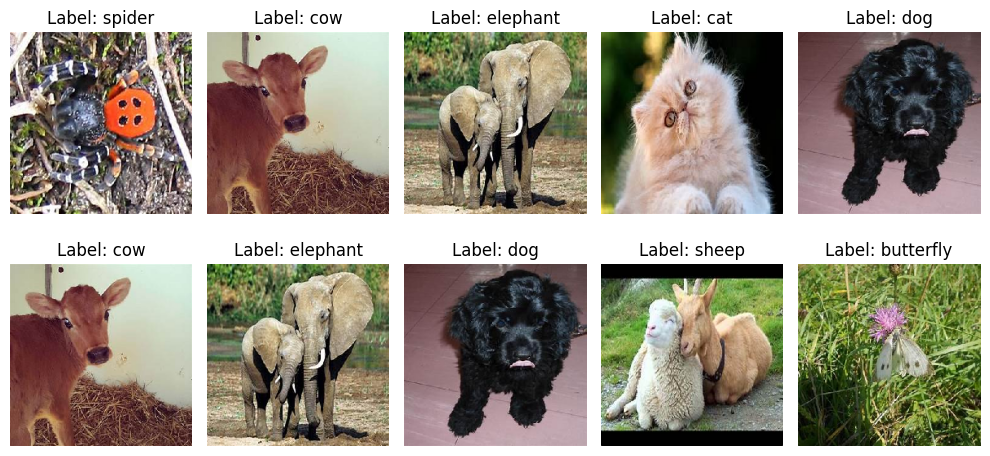

In [38]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "ragno": "spider", "dog": "cane", "cavallo": "horse", "elephant": "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    class_folder = os.path.join(dataset_path, class_labels[y_train[i]])
    image_names = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    original_image_path = os.path.join(class_folder, image_names[0])
    original_image = load_img(original_image_path, target_size=image_size)
    plt.imshow(original_image)

    plt.title(f"Label: {translate[class_labels[y_train[i]]]}")

    plt.axis('off')
plt.tight_layout()
plt.show()

### Random Forest Classifier

Train the model and make predictions.

In [9]:
X_train_flat = x_train.reshape(x_train.shape[0], -1)
X_val_flat = x_val.reshape(x_val.shape[0], -1)

rf_classifier = MnistClassifier(algorithm='rf')

rf_classifier.train(X_train_flat, y_train)

y_val_pred_rf = rf_classifier.predict(X_val_flat)

Generate Classification report

In [10]:
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)
print(f"Random Forest validation accuracy: {rf_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_rf))

Random Forest validation accuracy: 0.9505

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       616
           1       0.97      0.99      0.98       991
           2       0.99      0.90      0.94       343
           3       0.96      0.95      0.95       406
           4       0.94      0.86      0.90       376
           5       0.91      0.95      0.93       509
           6       0.91      0.97      0.94       959
           7       0.94      0.90      0.92       375
           8       0.97      0.97      0.97       358
           9       0.99      0.92      0.96       303

    accuracy                           0.95      5236
   macro avg       0.95      0.94      0.95      5236
weighted avg       0.95      0.95      0.95      5236



### Neural Network Classifier

Train the model and make predictions:

In [11]:
nn_classifier = MnistClassifier(algorithm='nn')

nn_classifier.train(x_train, y_train)
y_val_pred_nn = nn_classifier.predict(x_val)

/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8938 - loss: 0.3358
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9640 - loss: 0.1152
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9740 - loss: 0.0820
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9785 - loss: 0.0661
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9803 - loss: 0.0602
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9826 - loss: 0.0531
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9837 - loss: 0.0515
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9874 - loss: 0.0434
Epoch 9/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0355
Epoch 10/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9909 - loss: 0.0283
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step


Create classification report

In [12]:

nn_accuracy = accuracy_score(y_val, y_val_pred_nn)
print(f"Neural Network validation accuracy: {nn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_nn))

Neural Network validation accuracy: 0.9656

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       616
           1       0.99      0.99      0.99       991
           2       0.99      0.92      0.95       343
           3       0.95      0.98      0.97       406
           4       0.95      0.90      0.93       376
           5       0.92      0.98      0.95       509
           6       0.96      0.97      0.96       959
           7       0.95      0.94      0.95       375
           8       0.97      0.98      0.97       358
           9       0.97      0.95      0.96       303

    accuracy                           0.97      5236
   macro avg       0.96      0.96      0.96      5236
weighted avg       0.97      0.97      0.97      5236



### Convolutional Neural Network Classifier

Train the model and make predictions

In [13]:
cnn_classifier = MnistClassifier(algorithm='cnn')

x_train_reshaped = x_train.reshape(x_train.shape[0], 32, 32, 2)

cnn_classifier.train(x_train_reshaped, y_train)

x_val_reshaped = x_val.reshape(x_val.shape[0], 32, 32, 2)
y_val_pred_cnn = cnn_classifier.predict(x_val_reshaped)

/Users/denisbodnar/.pyenv/versions/3.10.16/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8007 - loss: 0.6602
Epoch 2/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9524 - loss: 0.1531
Epoch 3/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9691 - loss: 0.1033
Epoch 4/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9775 - loss: 0.0720
Epoch 5/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9836 - loss: 0.0522
Epoch 6/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9887 - loss: 0.0413
Epoch 7/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9924 - loss: 0.0258
Epoch 8/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9928 - loss: 0.0237
Epoch 9/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9953 - loss: 0.0145
Epoch 10/10
655/655 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9949 - loss: 0.0171
164/164 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Generate accuracy report

In [14]:
cnn_accuracy = accuracy_score(y_val, y_val_pred_cnn)
print(f"Convolutional Network validation accuracy: {cnn_accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred_cnn))

Convolutional Network validation accuracy: 0.9435

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       616
           1       0.96      0.99      0.97       991
           2       0.94      0.94      0.94       343
           3       0.97      0.93      0.95       406
           4       0.87      0.87      0.87       376
           5       0.87      0.97      0.92       509
           6       0.95      0.94      0.95       959
           7       0.98      0.83      0.90       375
           8       0.96      0.96      0.96       358
           9       0.98      0.91      0.95       303

    accuracy                           0.94      5236
   macro avg       0.94      0.93      0.94      5236
weighted avg       0.94      0.94      0.94      5236



## Predictions visualization and comparison

Build the comparison chart with example results

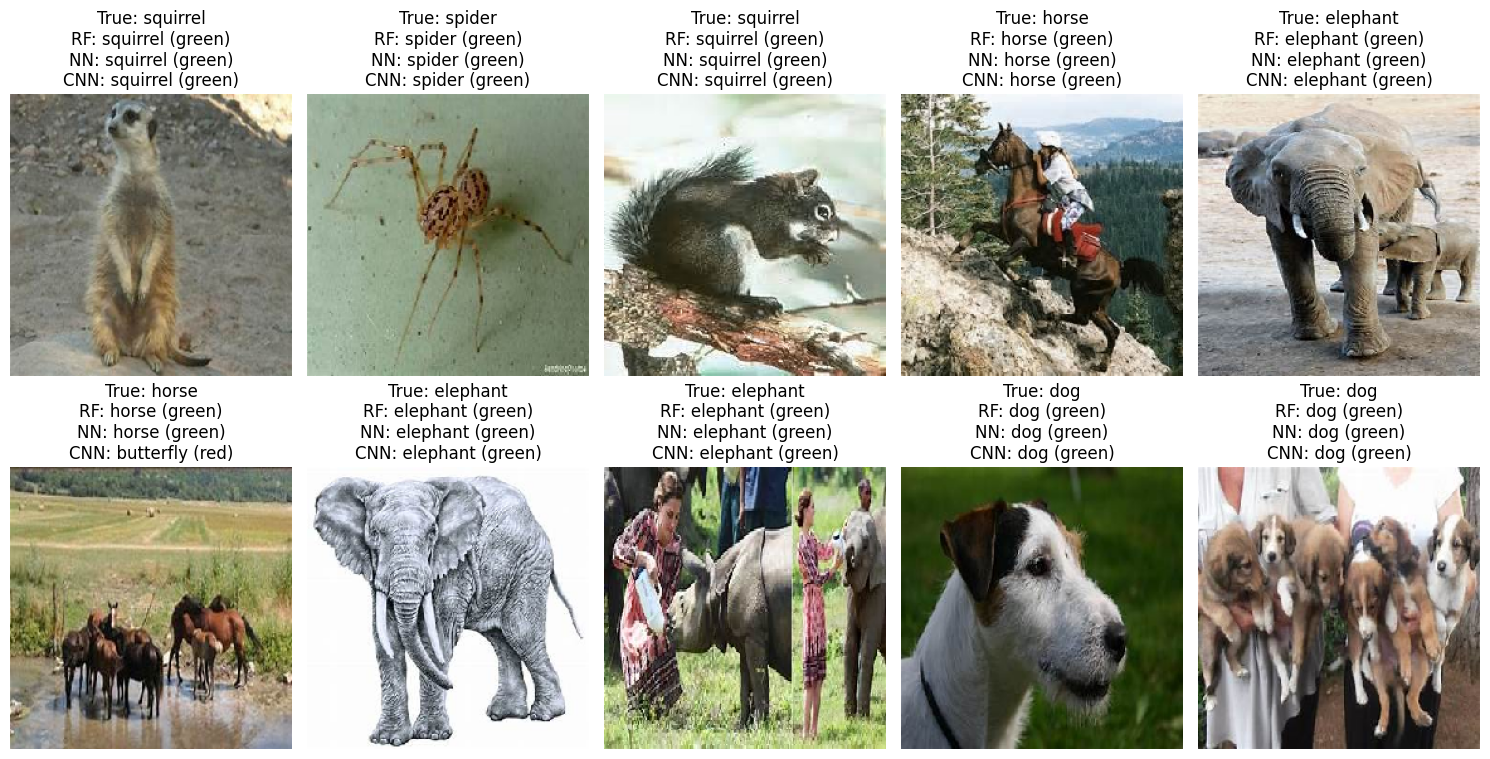

In [40]:
n_examples = 10
example_indices = np.random.choice(len(x_val), n_examples, replace=False)

example_images = x_val[example_indices]
true_labels = y_val[example_indices]
rf_preds = y_val_pred_rf[example_indices]
nn_preds = y_val_pred_nn[example_indices]
cnn_preds = y_val_pred_cnn[example_indices]

plt.figure(figsize=(15, 8))
for i in range(n_examples):
    plt.subplot(2, 5, i + 1)
    class_folder = os.path.join(dataset_path, class_labels[true_labels[i]])
    
    image_names = [img for img in os.listdir(class_folder) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if i < len(image_names):
        original_image_path = os.path.join(class_folder, image_names[i])
    else:
        original_image_path = None
    
    if os.path.exists(original_image_path):
        original_image = load_img(original_image_path, target_size=image_size)
        plt.imshow(original_image)
    else:
        print(f"File not found: {original_image_path}")
        plt.imshow(np.zeros(image_size)) 
    
    rf_color = 'green' if rf_preds[i] == true_labels[i] else 'red'
    nn_color = 'green' if nn_preds[i] == true_labels[i] else 'red'
    cnn_color = 'green' if cnn_preds[i] == true_labels[i] else 'red'
    
    plt.title(f"True: {translate[class_labels[true_labels[i]]]}\nRF: {translate[class_labels[rf_preds[i]]]} ({rf_color})\nNN: {translate[class_labels[nn_preds[i]]]} ({nn_color})\nCNN: {translate[class_labels[cnn_preds[i]]]} ({cnn_color})",
              fontdict={'color': 'black'})
    plt.axis('off')
    
plt.tight_layout()
plt.show()